# Modelo de Regresión Lineal con Python

En primer lugar, importamos las librerias

In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from statsmodels.api import add_constant, OLS
from statsmodels.formula.api import ols

import pylab as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Cargamos el csv y hacemos una visualizacion de los datos

In [37]:
df = pd.read_excel('Files/regression_data.xlsx')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### 2. Exploracion de los datos

Vamos a ver si el dataframe contiene datos nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

Vemos que no tiene ningun valor nulo. Lo si guinte que vamos a hacer es una descripcion estadistica de los datos

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


A continuacion vamos a elegir las variables a las que vamos a aplicar el modelo de regresion. Para ello realizamos el mapa de calor o heatmap, en el que vemos la correlacion de cada variable con respecto a las demas variables del dataset

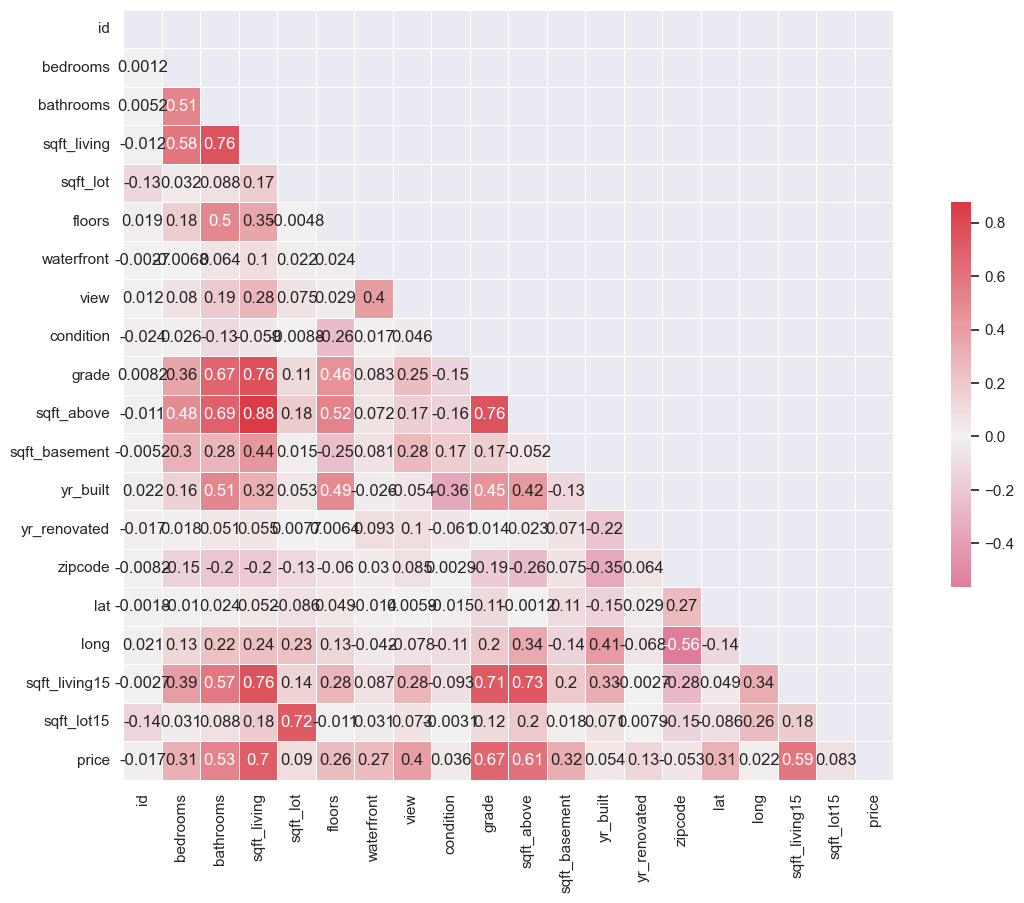

In [13]:
plt.figure(figsize=(15, 10))

sns.set(style='darkgrid')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

### 3. Modelo de Regresion Lineal

Creamos la funcion para el modelo de regresion lineal

In [14]:
def plot_regression_model(x,y):
    
    x_const = add_constant(x) # add a constant to the model
    
    modelo = OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    print(modelo.summary());
    try:
        const = modelo.params[0] # create a variable with the value of the constant given by the summary
        coef = modelo.params[1] # create a variable with the value of the coef given by the summary

        x_l=np.linspace(x.min(), x.max(), 50) 
        y_l= coef*x_l + const # function of the line

        plt.figure(figsize=(10, 10));

        # plot the line
        plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

        # data
        plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

        plt.title('Regresion lineal')
        plt.xlabel(f'{x.name}')
        plt.ylabel(f'{y.name}')
        plt.legend()
        plt.show();
        return modelo
    except:
        print('No se puede imprimir la recta de regresión para modelos multivariable')
        plt.show();
        return modelo

Aplicamos una regresion lineal a cada variable dependiente, que seran las columnas del dataframe, con la variable independiente, la cual esta formada por la columna "price" del dataset

In [38]:
df.drop(columns='date', inplace=True)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


Se pide que la variable dependiente sea "price", por lo que las variables dependientes formaran otro dataset exceptuando dicha columna de datos, que la guardaremos en otra variable

In [41]:
X = df.drop('price', axis=1)
y = df.price

Antes de ellevar a cabo la regresion, hemos de eliminar la columna "date" del dataset, al ser sus datos de tipo date, ya que no podemos realizar una regresion lineal con fechas 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.076
Date:                Sun, 11 Dec 2022   Prob (F-statistic):             0.0137
Time:                        01:03:29   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.501e+05   4699.710    117.051      0.0

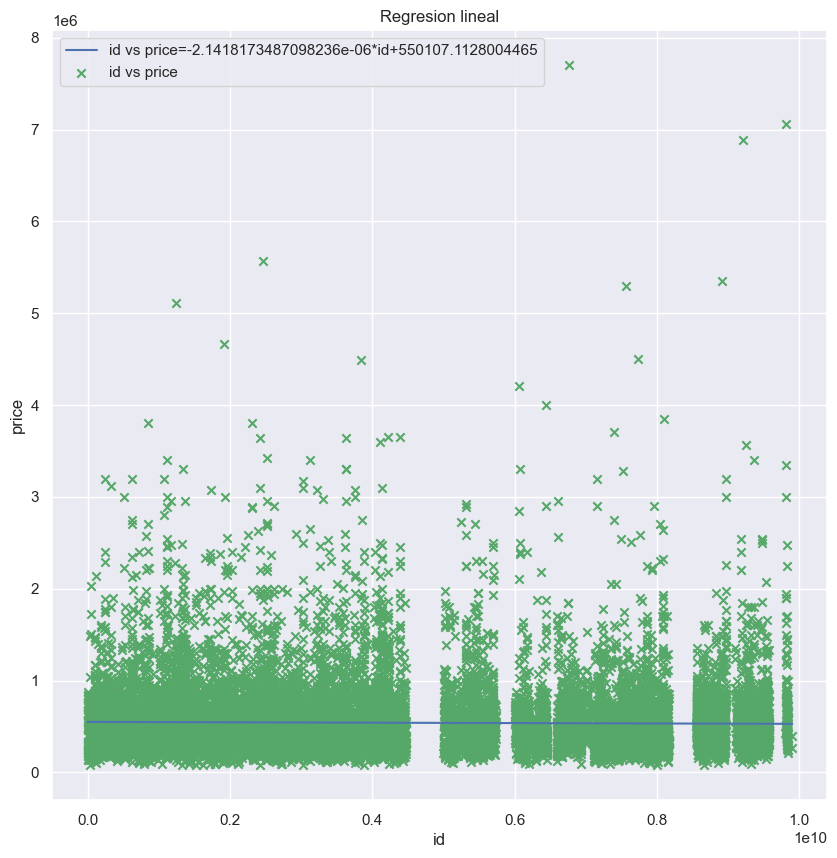

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:30   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.0

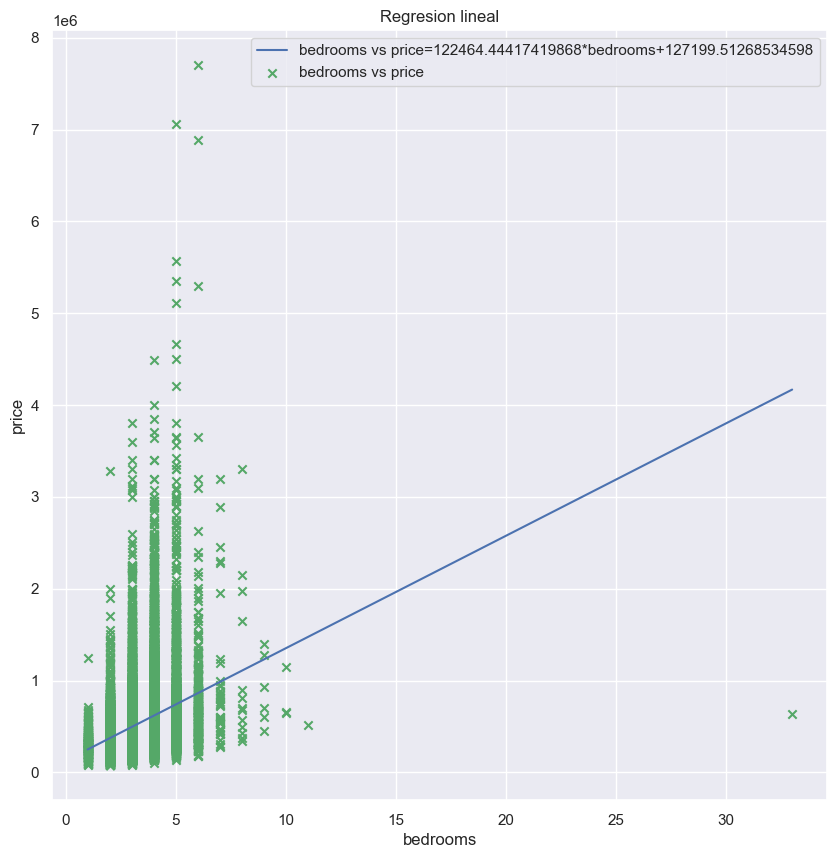

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:31   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.1

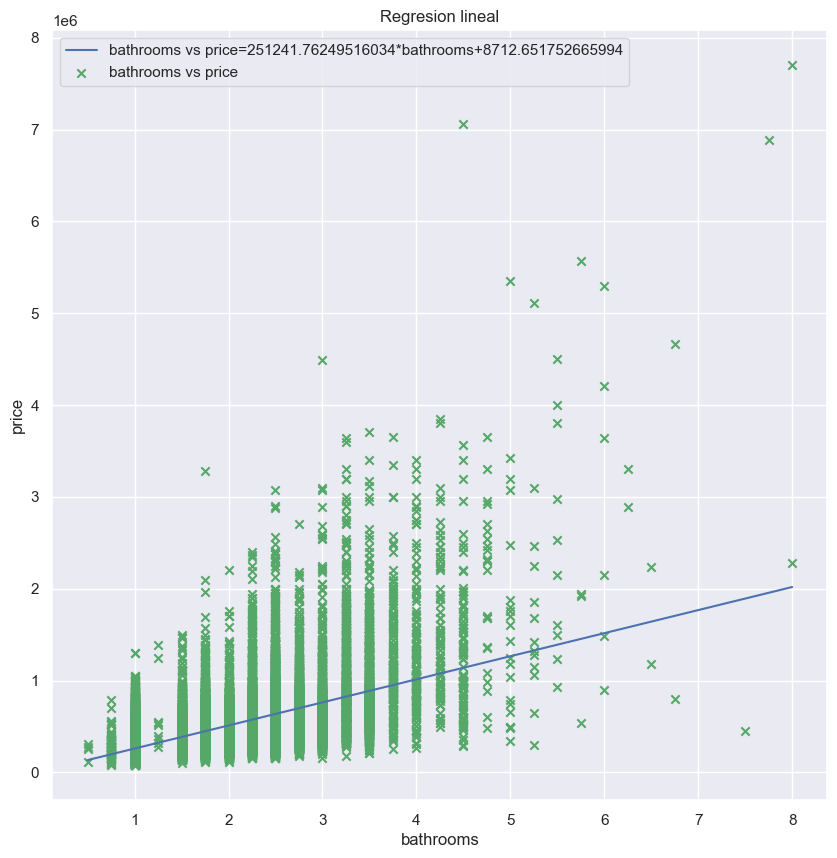

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:31   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

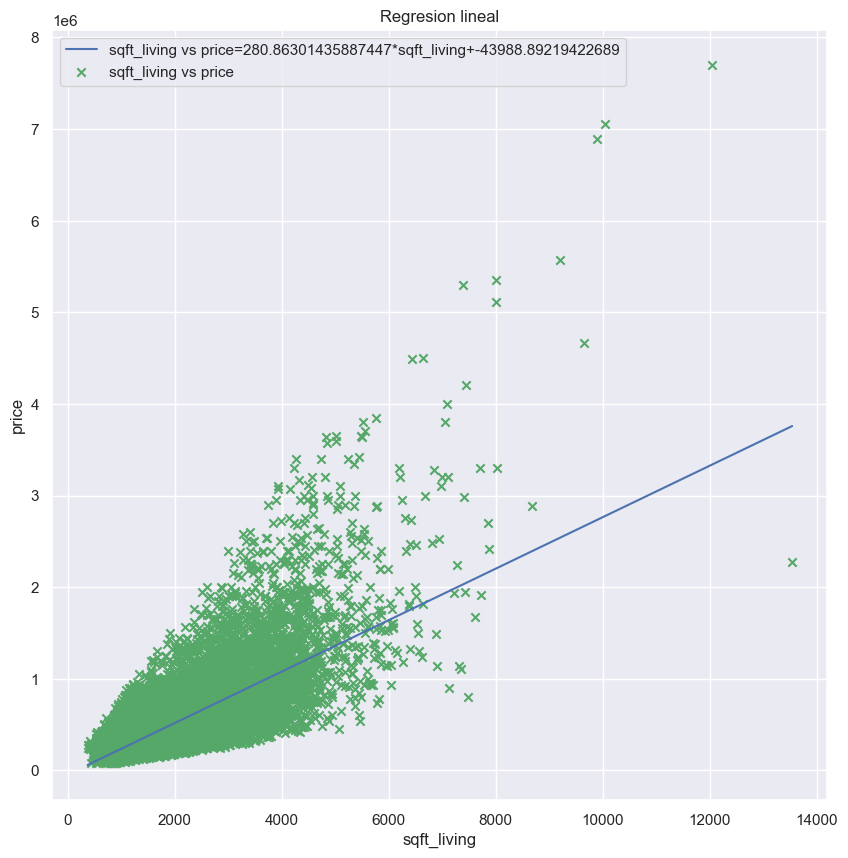

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           5.57e-40
Time:                        01:03:32   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.283e+05   2650.075    199.337      0.0

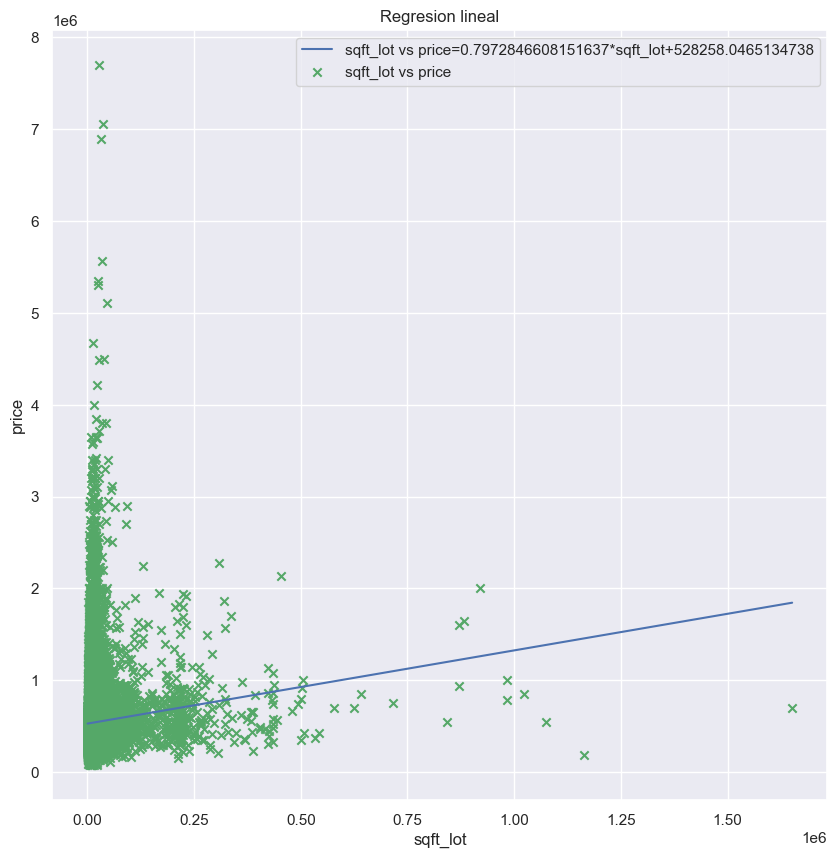

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1525.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.57e-322
Time:                        01:03:33   Log-Likelihood:            -3.0665e+05
No. Observations:               21597   AIC:                         6.133e+05
Df Residuals:                   21595   BIC:                         6.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.791e+05   7111.797     39.247      0.0

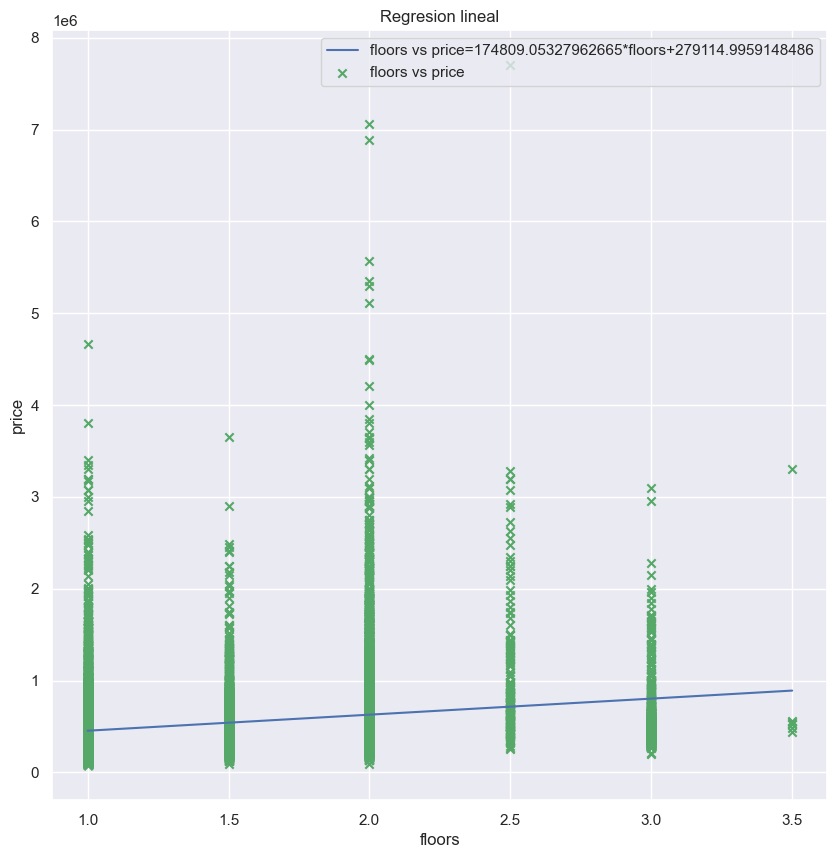

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1650.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:35   Log-Likelihood:            -3.0660e+05
No. Observations:               21597   AIC:                         6.132e+05
Df Residuals:                   21595   BIC:                         6.132e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.318e+05   2418.662    219.858      0.0

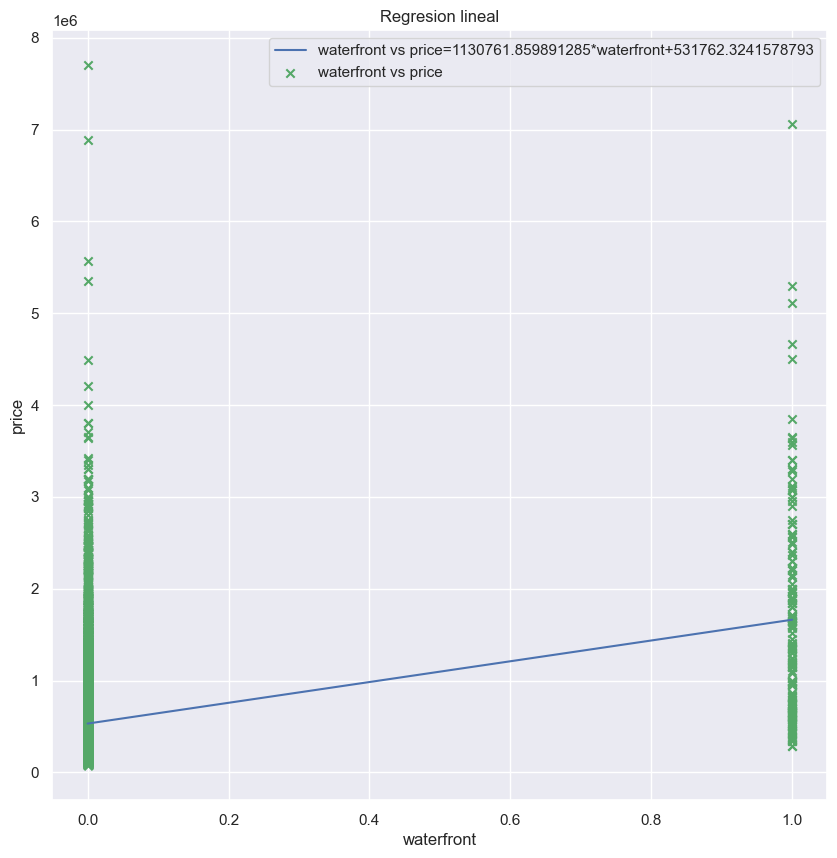

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4049.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:36   Log-Likelihood:            -3.0554e+05
No. Observations:               21597   AIC:                         6.111e+05
Df Residuals:                   21595   BIC:                         6.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.957e+05   2398.820    206.630      0.0

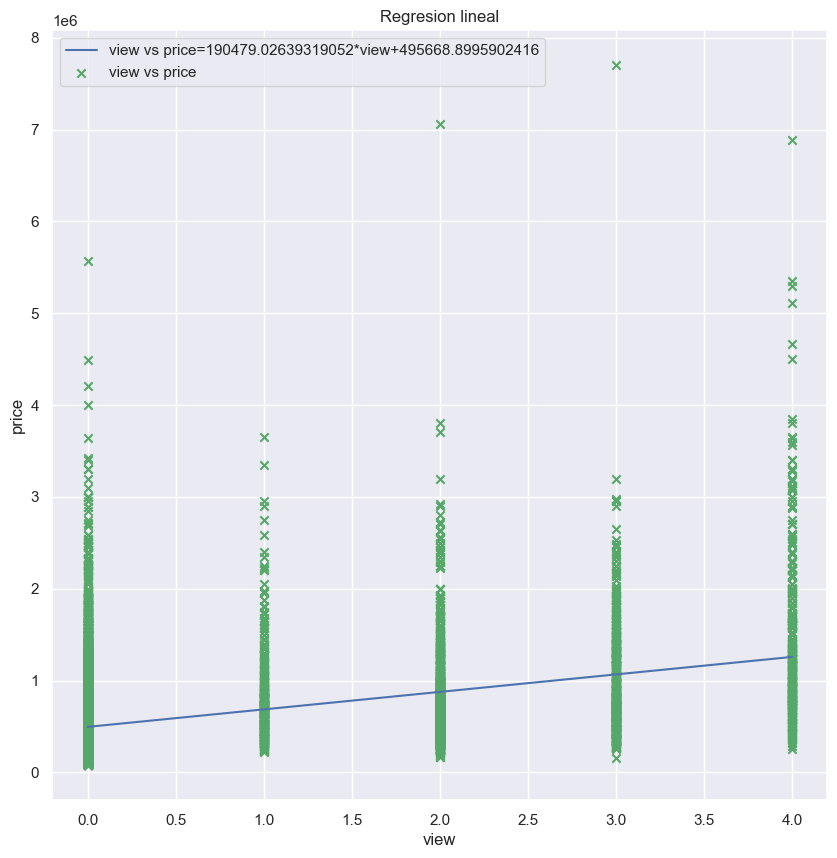

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.16e-07
Time:                        01:03:36   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.709e+05   1.33e+04     35.322      0.0

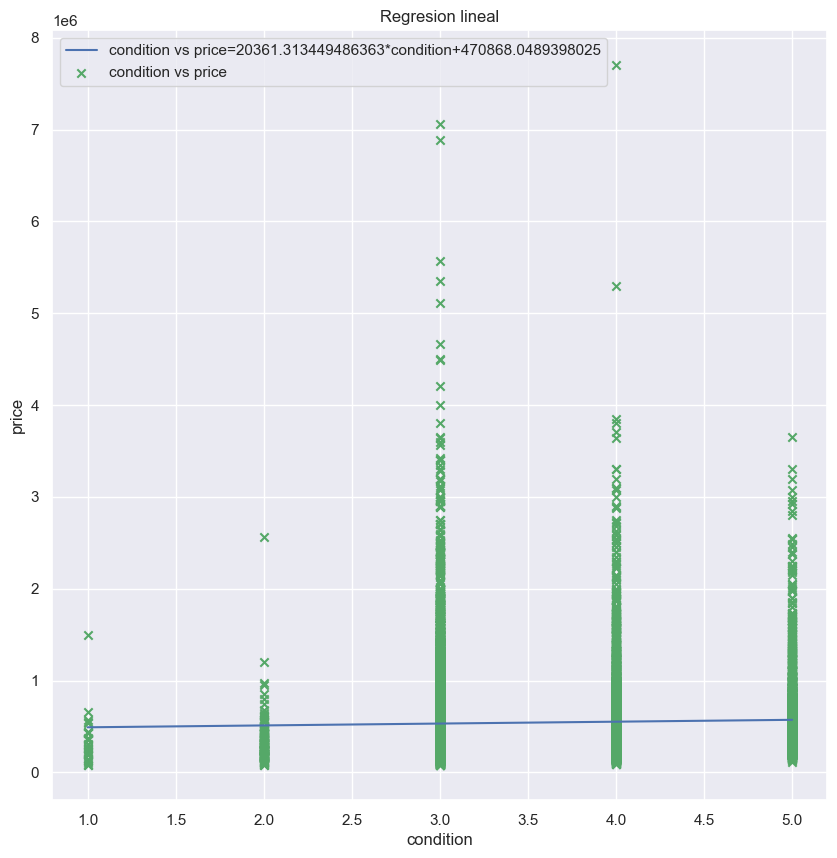

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:37   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.0

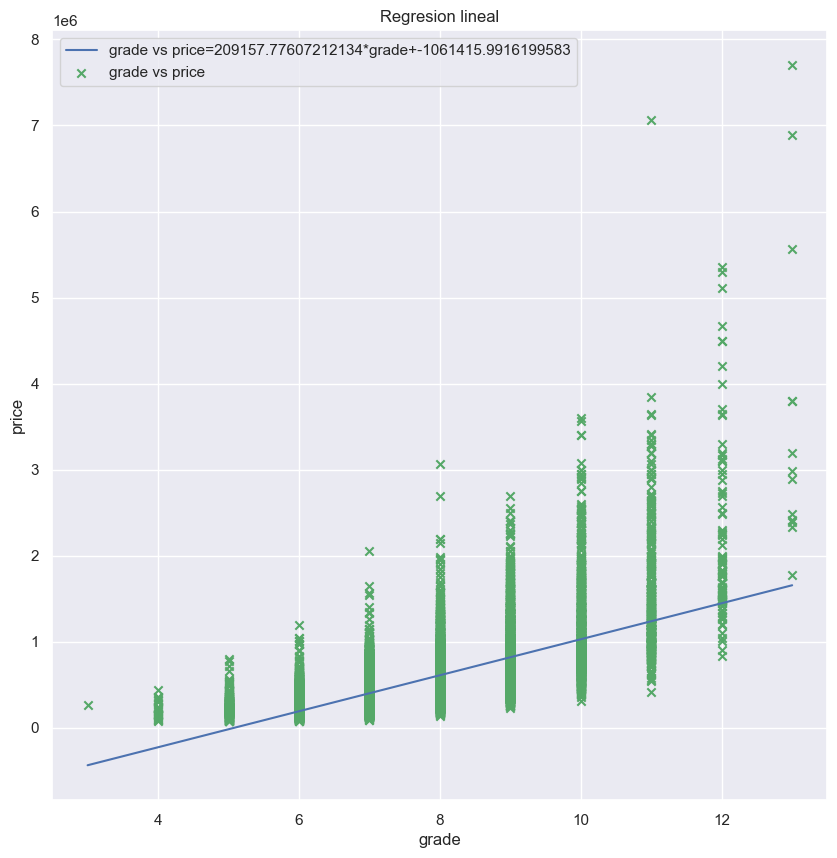

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:38   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.0

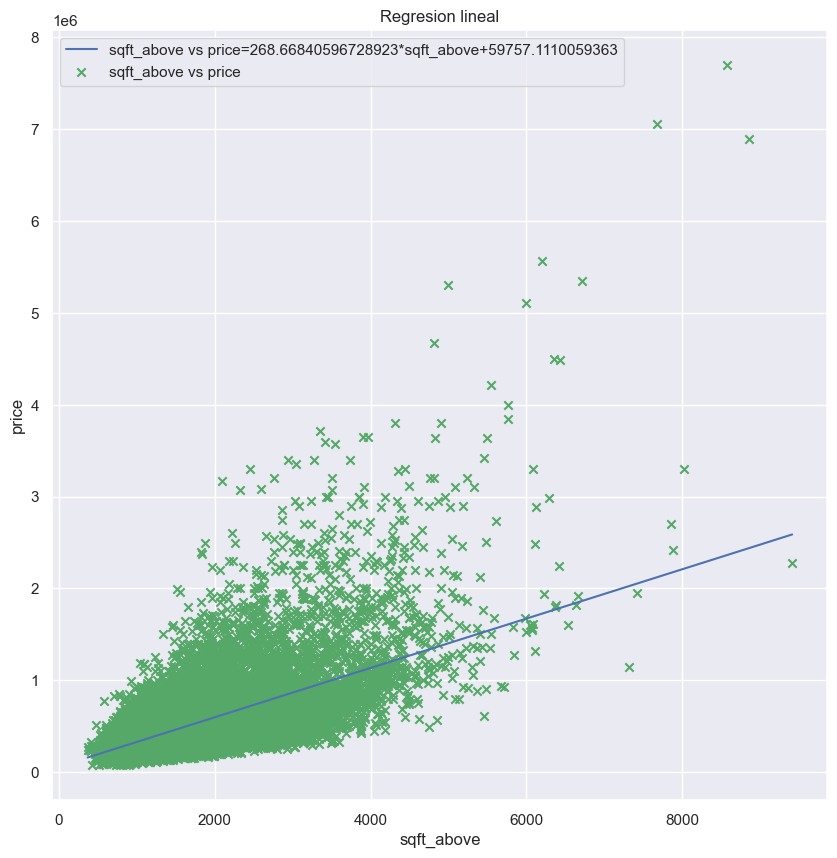

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2529.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:39   Log-Likelihood:            -3.0619e+05
No. Observations:               21597   AIC:                         6.124e+05
Df Residuals:                   21595   BIC:                         6.124e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.619e+05   2832.612    163.067

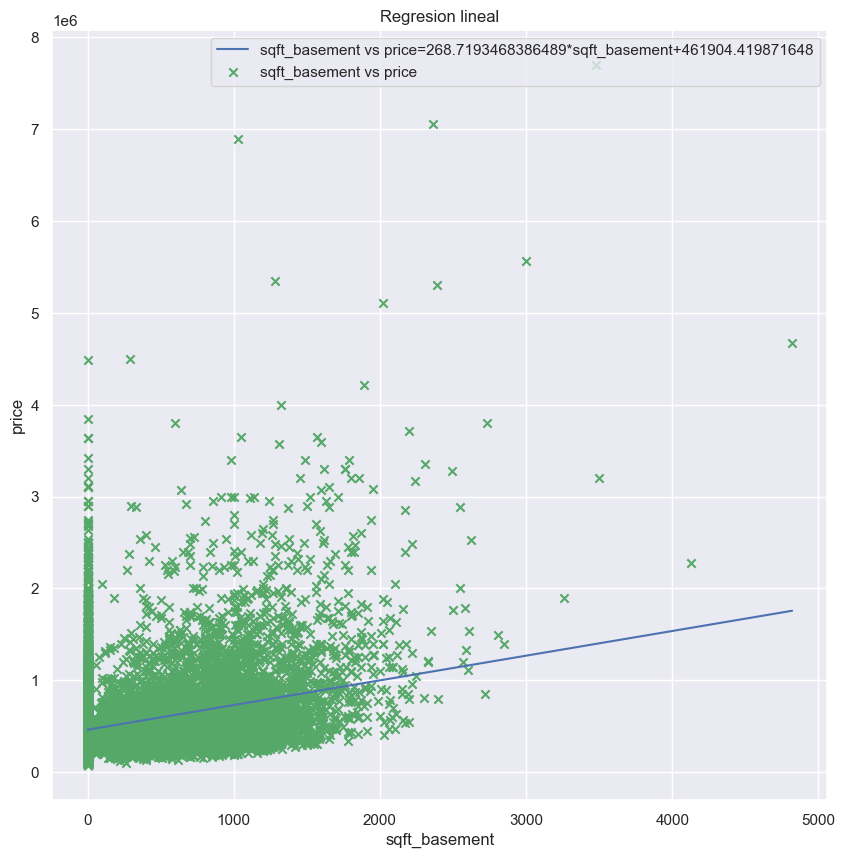

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           2.12e-15
Time:                        01:03:40   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.896e+05   1.68e+05     -4.714      0.0

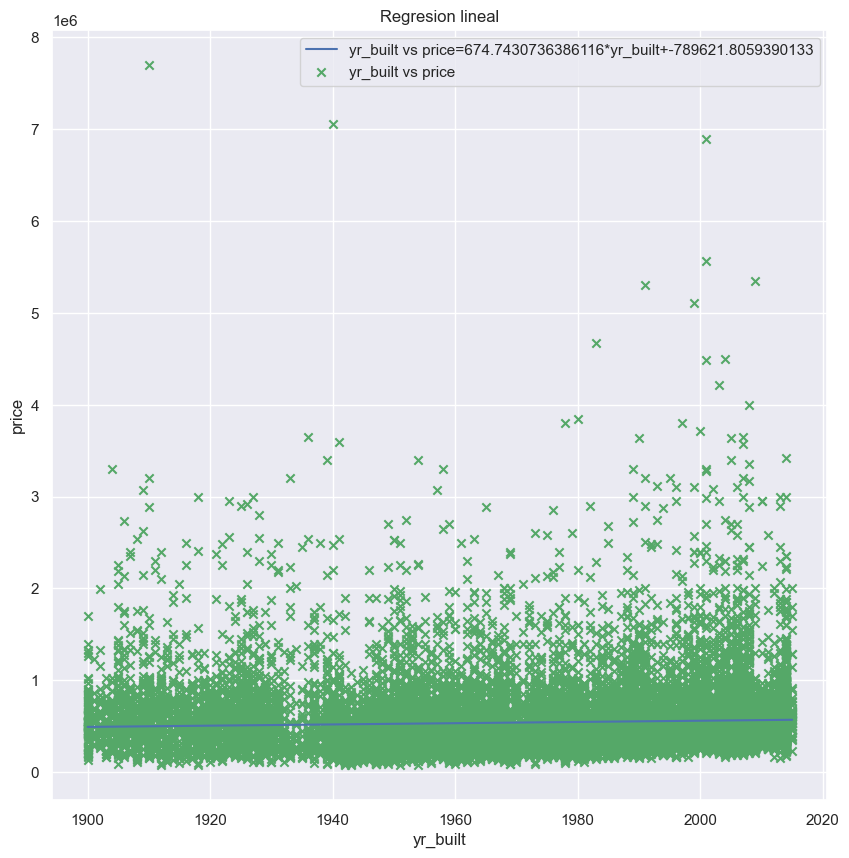

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.20e-77
Time:                        01:03:41   Log-Likelihood:            -3.0722e+05
No. Observations:               21597   AIC:                         6.144e+05
Df Residuals:                   21595   BIC:                         6.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.305e+05   2533.994    209.367   

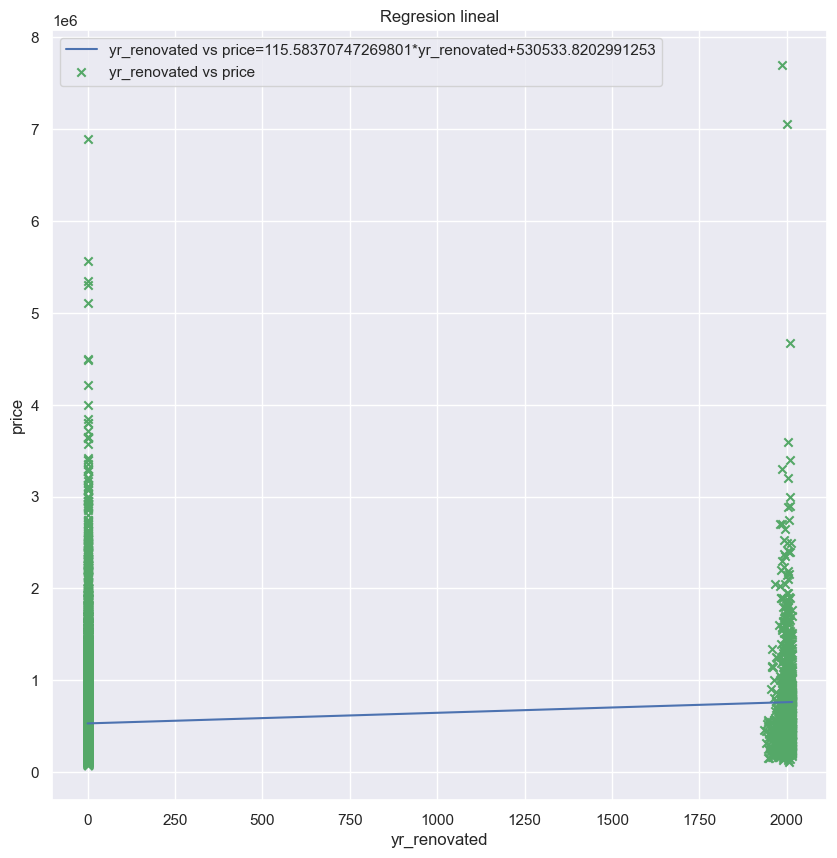

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.06e-15
Time:                        01:03:42   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.65e+07   4.58e+06      7.977      0.0

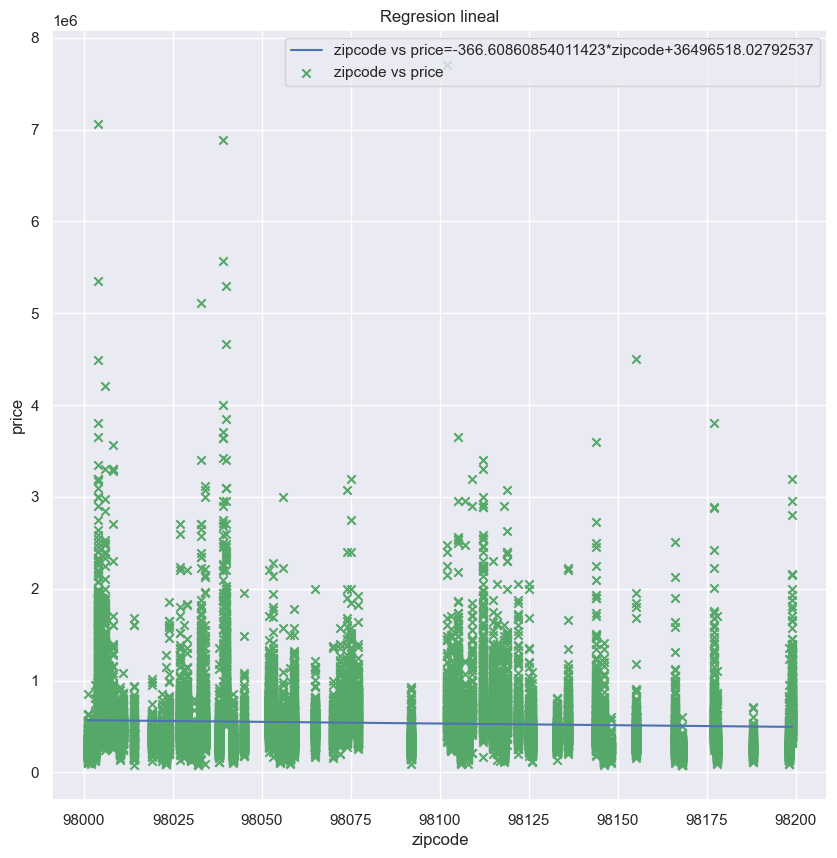

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2242.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:44   Log-Likelihood:            -3.0632e+05
No. Observations:               21597   AIC:                         6.127e+05
Df Residuals:                   21595   BIC:                         6.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.814e+07   8.17e+05    -46.689      0.0

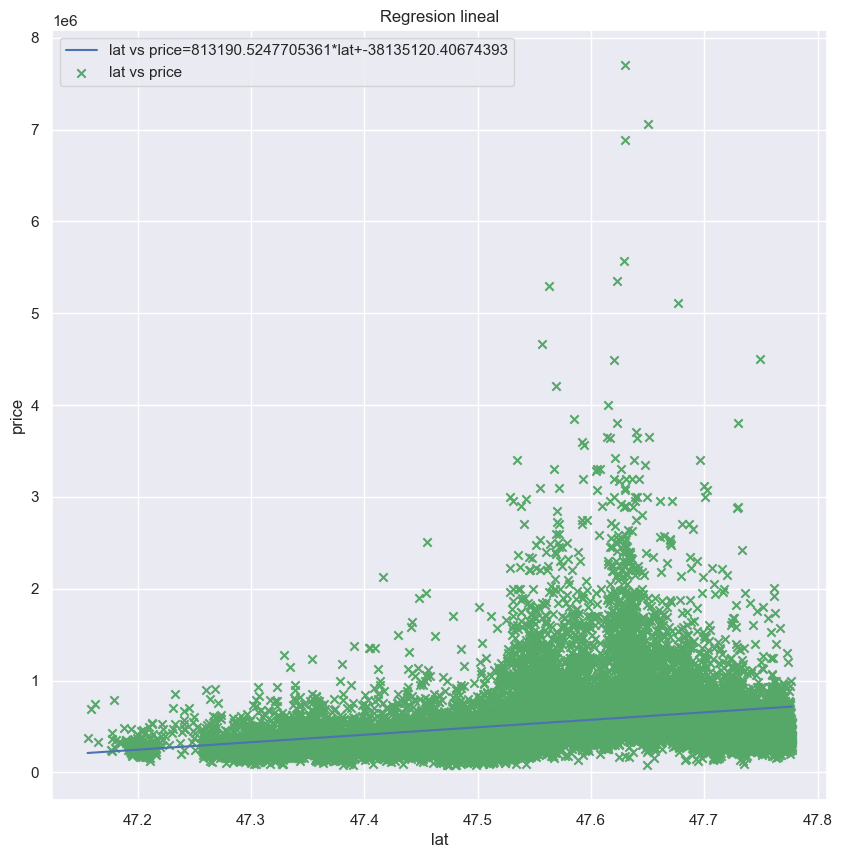

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.49
Date:                Sun, 11 Dec 2022   Prob (F-statistic):            0.00120
Time:                        01:03:45   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.571e+06   2.17e+06      3.488      0.0

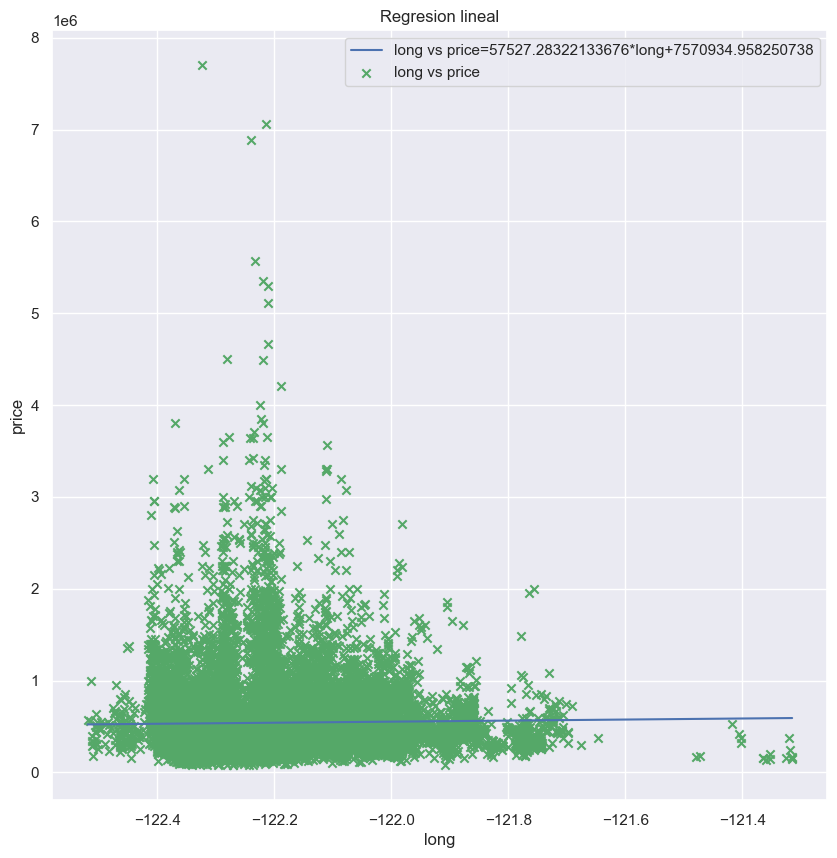

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:03:45   Log-Likelihood:            -3.0286e+05
No. Observations:               21597   AIC:                         6.057e+05
Df Residuals:                   21595   BIC:                         6.057e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.303e+04   6216.659    -13.356

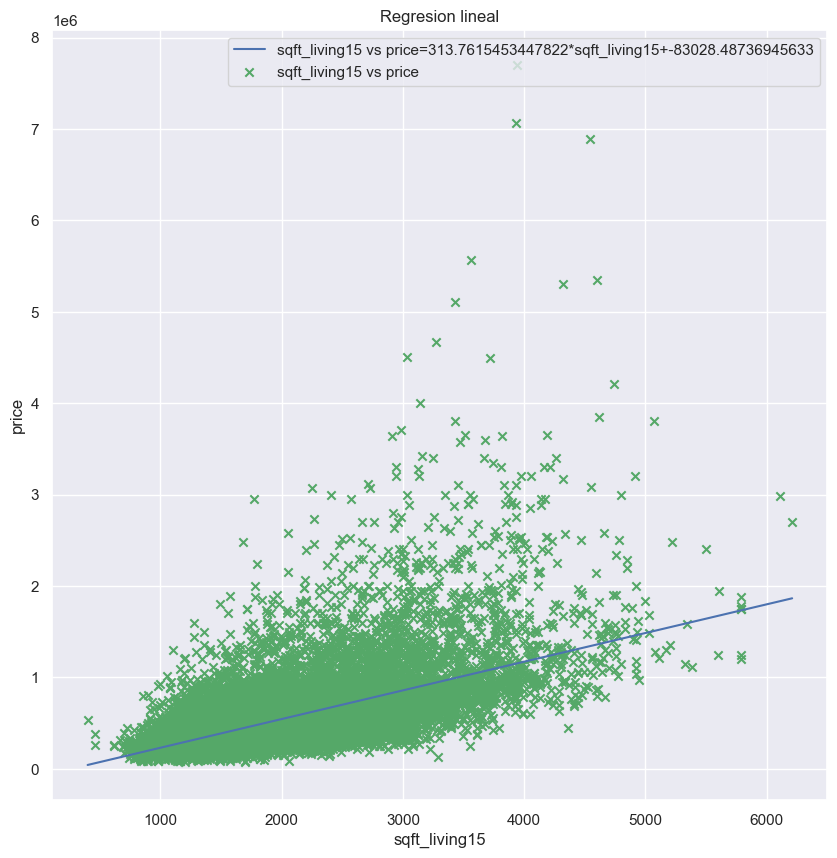

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           3.30e-34
Time:                        01:03:47   Log-Likelihood:            -3.0732e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.261e+05   2750.361    191.269      0.0

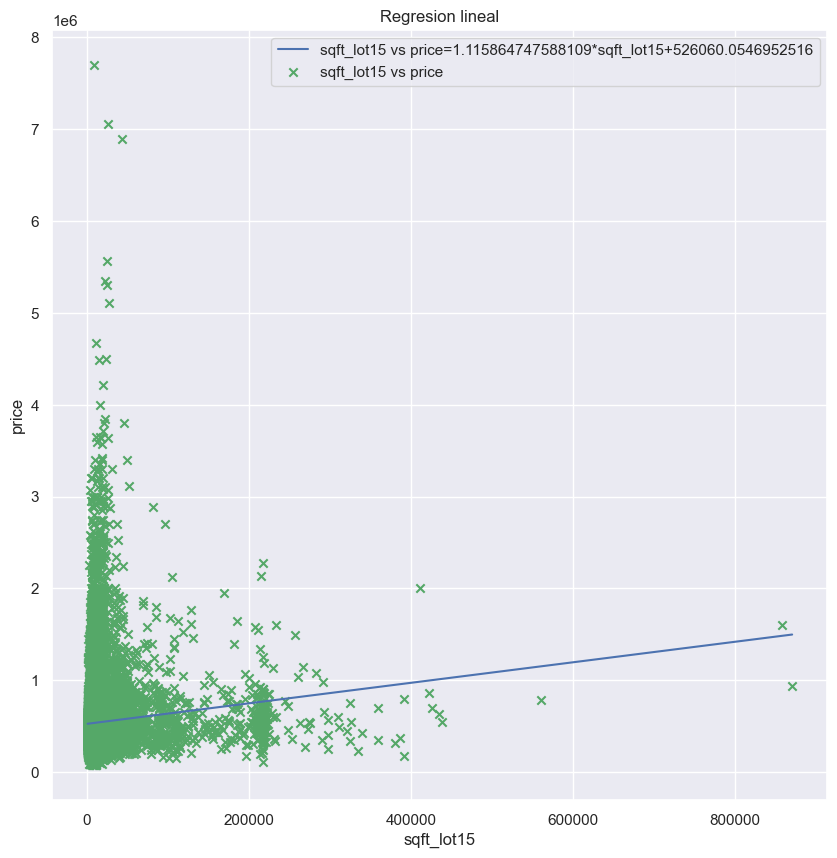

In [43]:
for columna in X:
    plot_regression_model(X[columna], y)

Hacemos la regresion multiple

In [44]:
multi_regress = plot_regression_model(X, y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2800.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:07:02   Log-Likelihood:            -2.9438e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.815e+06   2.93e+06      2.323

<Figure size 1000x1000 with 0 Axes>